Some libraries and modules needed for the project:

In [1]:
import os
import glob
import lens as l
import numpy as np
import matplotlib.pyplot as plt
import source as s
from PIL import Image
from numpy import asarray
from tqdm import tqdm

## 0. Introducción: Imagen sin lente aplicada

En todo momento las coordenadas X van a ser de la imagen una vez pasada por la lente, mientras que para la fuente usaremos coordenadas Y. <br />

Lo que hacemos en este código es, una vez definido nuestro archivo source.py creamos un vector imagen en el que aplicamos la ecuación de la lente gravitacional. Haciendo conversines de coordenadas hallamos el valor del píxel y después comprobamos 
dónde están los píxeles del espacio imagen en el espacio fuente. Si estos se encuentran en el espacio fuente les damos el msimo valor que en esta y listo. Si no les damos un valor arbitrario.


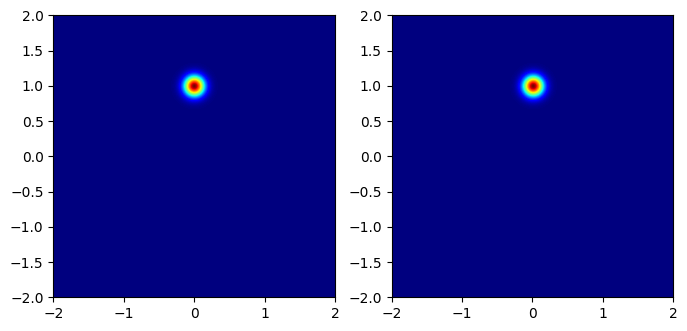

In [2]:
nx=401      # Tamaño de la imagen (pix)s
ny=401      # Tamaño source (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map

#Source parameters
xpos=0.0          # Source position. X coordinate
ypos=1.0          # Source position. Y coordinate
rad=0.1           # Radius of source
ipos=int(round(xpos/ys))       # Convert source parameters to pixels
jpos=int(round(-ypos/ys))
rpix=int(round(rad/ys))
a=s.gcirc(ny,rpix,jpos,ipos)   # This is a circular gaussian source
b=np.zeros((nx,nx))            # This is the image plane

#This is the main loop over pixles at the image plane
for j1 in range(nx):
    for j2 in range(nx):
        x1=-xl+j2*xs # Convert pix to coords on image.
        x2=-xl+j1*xs
        y1=x1-0.0 # Deflect X coordinate
        y2=x2-0.0 # Deflect Y coordinate
        i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
        i1=int(round((y2+yl)/ys))
        # If deflected ray hits a pixel within source then set image
        # to brightness on that pixel
        if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
            b[j1,j2]=a[i1,i2]
        
# Plot stuff
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(121)
plt.imshow(a,extent=(-yl,yl,-yl,yl),cmap='jet')
plt.subplot(122)
plt.imshow(b,extent=(-xl,xl,-xl,xl),cmap='jet')
plt.show()

## 1. Lente puntual

Ahora tomamos una lente puntial, creada en un archivo lens.py en la que definimos una función Point. Podemos aplicar esta función al espacio de la imagen y comprobar la localización de los distintos píxeles, acabando con una imagen final como antes. <br />

Para esto lo que haremos es importar nuestro módulo lens.py y cuando calculamos la ecuación de la lente y la representaremos en el espacio imagen, de forma que llamaremos a la función definida (en este caso puntual) y le daremos las coordenadas, en vez de definirla como antes en una línea de código. <br />

Es importante ver que nuestra definición de fuente puntual genera una tupla de coordenadas, y al input hay que pasarle (x1,x2,x1l,x2l,ml). <br />

(!) -> En la conversión de pix-coord de las fuentes aparece un signo menos en el eje Y (esto es por la forma en la que Python mira la imagen, empieza en la esquina superior izquierda en vez de la inferior, por lo quqe tenemos que poner este menos para que recorra los píxeles en el orden que nos interesa). Por esto para hacer coincidir las coordenadas de la lente y la fuente lo más fácil es poner ambas en 0,0 o poner la misma coordenada X y las coordenadas Y iguales pero de signo opuesto. <br />

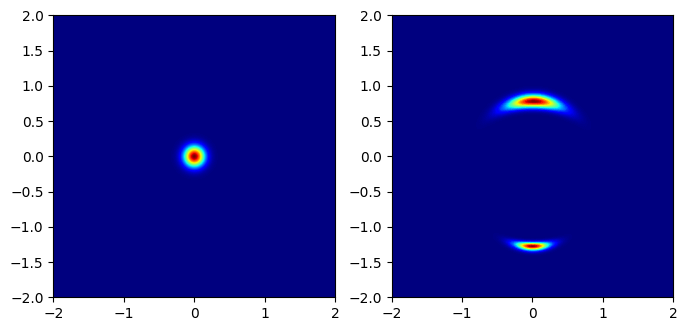

In [3]:
nx=401      # Tamaño de la imagen (pix)s
ny=401      # Tamaño source (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map

#Lens parameters
x1l=0       # X position
x2l=0.5       # Y position
ml=1        # Lens mass

#Source parameters
xpos=0.0          # Source position. X coordinate
ypos=0.0          # Source position. Y coordinate
rad=0.1           # Radius of source
ipos=int(round(xpos/ys))       # Convert source parameters to pixels
jpos=int(round(-ypos/ys))
rpix=int(round(rad/ys))
a=s.gcirc(ny,rpix,jpos,ipos)   # This is a circular gaussian source
b=np.zeros((nx,nx))            # This is the image plane

#This is the main loop over pixles at the image plane
for j1 in range(nx):
    for j2 in range(nx):
        x1=-xl+j2*xs # Convert pix to coords on image.
        x2=-xl+j1*xs
        y1,y2=l.Point(x1,x2,x1l,x2l,ml)
        i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
        i1=int(round((y2+yl)/ys))
        # If deflected ray hits a pixel within source then set image
        # to brightness on that pixel
        if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
            b[j1,j2]=a[i1,i2]
        
# Plot stuff
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(121)
plt.imshow(a,extent=(-yl,yl,-yl,yl),cmap='jet')
plt.subplot(122)
plt.imshow(b,extent=(-xl,xl,-xl,xl),cmap='jet')
plt.show()

## 2. Binary lens
Ahora aplicamos una lente binaria, la cual definiremos de nuevo en el archivo lens.py. Básicamente es el mismo efecto pero creamos una segunda lente con el mismo efecto. Es por esto que en este caso nuestro imput a la función lente tendrá el doble de parámetros. Cambiando la posición relativa de ambas lentes y su masa podemos ver distintos efectos.

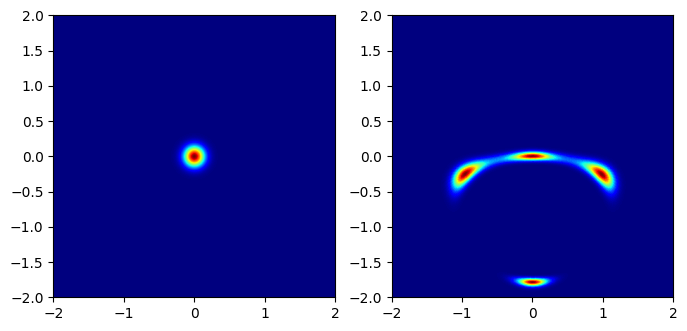

In [4]:
nx=401      # Tamaño de la imagen (pix)s
ny=401      # Tamaño source (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map



#Lenses parameters
x1l1=0       # X position
x2l1=-2      # Y position
ml1=2        # Lens mass

x1l2=0        # X position
x2l2=1        # Y position
ml2=1         # Lens mass



#Source parameters
xpos=0.0          # Source position. X coordinate
ypos=0.0          # Source position. Y coordinate
rad=0.1           # Radius of source
ipos=int(round(xpos/ys))       # Convert source parameters to pixels
jpos=int(round(-ypos/ys))
rpix=int(round(rad/ys))
a=s.gcirc(ny,rpix,jpos,ipos)   # This is a circular gaussian source
b=np.zeros((nx,nx))            # This is the image plane

#This is the main loop over pixles at the image plane
for j1 in range(nx):
    for j2 in range(nx):
        x1=-xl+j2*xs # Convert pix to coords on image.
        x2=-xl+j1*xs
        y1,y2=l.TwoPoints(x1,x2,x1l1,x2l1,x1l2,x2l2,ml1,ml2)
        i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
        i1=int(round((y2+yl)/ys))
        # If deflected ray hits a pixel within source then set image
        # to brightness on that pixel
        if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
            b[j1,j2]=a[i1,i2]
        
# Plot stuff
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(121)
plt.imshow(a,extent=(-yl,yl,-yl,yl),cmap='jet')
plt.subplot(122)
plt.imshow(b,extent=(-xl,xl,-xl,xl),cmap='jet')
plt.show()

## 3. Chang-Refsdal lens
Este tipo de lente es una extensión de la fuente puntual, en ella se incluye el efecto de un campo gravitacional uniforme de fondo mediante un término cuadrupolar incluido en la ecuación de la lente. Se incluyen ahora dos parámetros: <br />

 - $\kappa$ : convergencia.
 - $\gamma$ : corte.

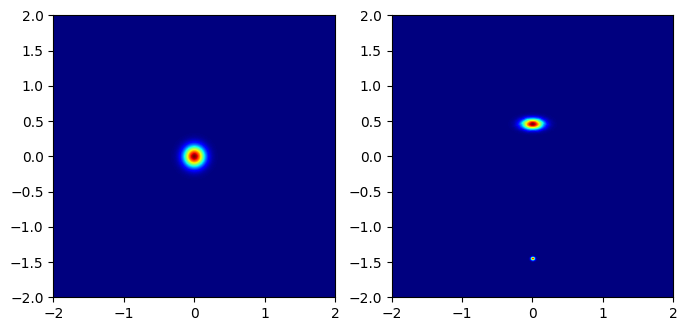

In [5]:
nx=401      # Tamaño de la imagen (pix)s
ny=401      # Tamaño source (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map



#Lens parameters
x1l=0      # X position of lens
x2l=1      # Y position of lens
ml=1       # Lens mass

k=0.5      # Convergence
g=1        # Shear


#Source parameters
xpos=0.0          # Source position. X coordinate
ypos=0.0          # Source position. Y coordinate
rad=0.1           # Radius of source
ipos=int(round(xpos/ys))       # Convert source parameters to pixels
jpos=int(round(-ypos/ys))
rpix=int(round(rad/ys))
a=s.gcirc(ny,rpix,jpos,ipos)   # This is a circular gaussian source
b=np.zeros((nx,nx))            # This is the image plane

#This is the main loop over pixles at the image plane
for j1 in range(nx):
    for j2 in range(nx):
        x1=-xl+j2*xs # Convert pix to coords on image.
        x2=-xl+j1*xs
        y1,y2=l.ChangRefsdal(x1,x2,x1l,x2l,ml,k,g)
        i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
        i1=int(round((y2+yl)/ys))
        # If deflected ray hits a pixel within source then set image
        # to brightness on that pixel
        if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
            b[j1,j2]=a[i1,i2]
        
# Plot stuff
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(121)
plt.imshow(a,extent=(-yl,yl,-yl,yl),cmap='jet')
plt.subplot(122)
plt.imshow(b,extent=(-xl,xl,-xl,xl),cmap='jet')
plt.show()


## 4. Singular Isothermal Sphere (SIS)
En este caso tendremos un modelo simple de lente que suele usarse para tratar de imitar las propiedades de una galaxia o cúmulo de galaxias cuando estas actúan como lente gravitacional. <br />

Este tipo de lente está caracterizada por su radio de Einstein:

$$\theta_E = 4\pi \left( \frac{\sigma_{v}^2}{c^2} \right) \frac{D_{ls}}{D_s}$$

Donde $\sigma_v$ es la dispersión de velocidades en una dimensión. <br />

Cabe destacar que existe una singuaridad en el origen por como está definida la lente. Esta singularidad puede evitarse creando un core finito en el punto central, cambiando las propiedades de la lente a distancias pequeñas de este centro. (este modelo se llama Non-Singular Isothermal Sphere) <br />

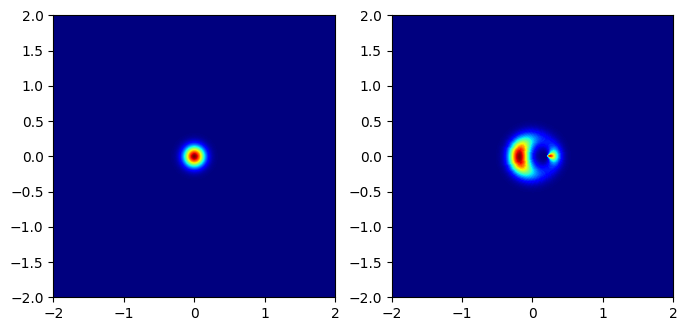

In [6]:
nx=401      # Tamaño de la imagen (pix)s
ny=401      # Tamaño source (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map



#Lens parameters
x1l=0.2      # X position of lens
x2l=0        # Y position of lens

k=0.2        # Einstein angle


#Source parameters
xpos=0.0          # Source position. X coordinate
ypos=0.0          # Source position. Y coordinate
rad=0.1           # Radius of source
ipos=int(round(xpos/ys))       # Convert source parameters to pixels
jpos=int(round(-ypos/ys))
rpix=int(round(rad/ys))
a=s.gcirc(ny,rpix,jpos,ipos)   # This is a circular gaussian source
b=np.zeros((nx,nx))            # This is the image plane

#This is the main loop over pixles at the image plane
for j1 in range(nx):
    for j2 in range(nx):
        x1=-xl+j2*xs # Convert pix to coords on image.
        x2=-xl+j1*xs
        y1,y2=l.SIS(x1,x2,x1l,x2l,k)
        i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
        i1=int(round((y2+yl)/ys))
        # If deflected ray hits a pixel within source then set image
        # to brightness on that pixel
        if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
            b[j1,j2]=a[i1,i2]
        
# Plot stuff
plt.figure(figsize=(8, 6), dpi=100)
plt.subplot(121)
plt.imshow(a,extent=(-yl,yl,-yl,yl),cmap='jet')
plt.subplot(122)
plt.imshow(b,extent=(-xl,xl,-xl,xl),cmap='jet')
plt.show()



## 5. Real data source from Hubble Deep Field
In this cell we will reproduce a real data image when it is though a lens. <br />

### HDF with SIS lens

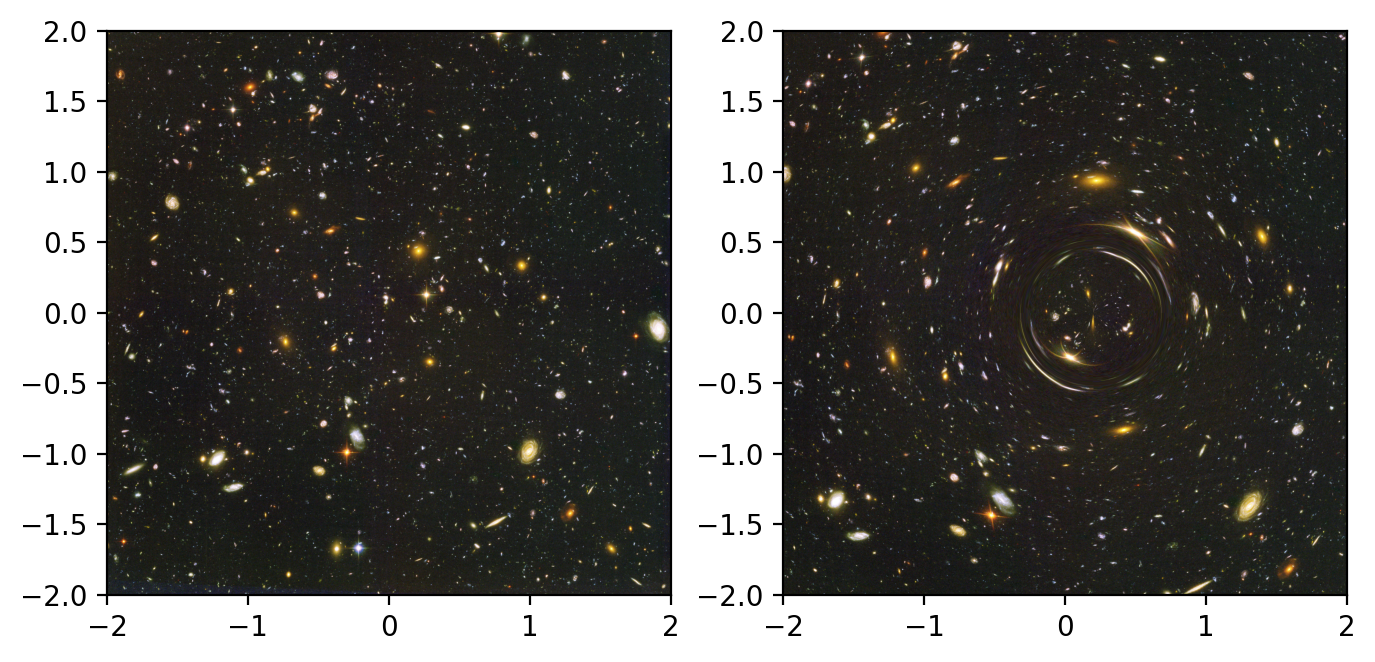

<Figure size 432x288 with 0 Axes>

In [7]:
#Importing image from HST
im = Image.open("hudf_small.jpg")
data = asarray(im)
im_r=data[:,:,0]
im_g=data[:,:,1]
im_b=data[:,:,2]
rgb=[im_r,im_g,im_b]



#Shape of pixels in image:
nx=len(data)      # Tamaño de la imagen (pix)s
ny=len(data)      # Tamaño source (pix)
xl=2.
yl=2.
xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map



#Lens parameters
x1l=0.2      # X position of lens
x2l=0        # Y position of lens
k=0.5        # Einstein angle



# Empty vector for lensed images:
b1=np.zeros((nx,nx))
b2=np.zeros((nx,nx))
b3=np.zeros((nx,nx))
lensed=[b1,b2,b3]


    
#This is the main loop over pixles at the image plane
for i in range(3):
    for j1 in range(nx):
        for j2 in range(nx):
            x1=-xl+j2*xs # Convert pix to coords on image.
            x2=-xl+j1*xs
            y1,y2=l.SIS(x1,x2,x1l,x2l,k)
            i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
            i1=int(round((y2+yl)/ys))
            # If deflected ray hits a pixel within source then set image
            # to brightness on that pixel
            if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
                lensed[i][j1,j2]=rgb[i][i1,i2]

                
                
# Join the three colours in one jpg and show:
source_rgb = np.dstack((im_r,im_g,im_b))
lensed_rgb = np.dstack((b1,b2,b3))
plt.figure(figsize=(8, 6), dpi=200)
plt.subplot(121)
plt.imshow(source_rgb,extent=(-yl,yl,-yl,yl))
plt.subplot(122)
plt.imshow(lensed_rgb.astype('uint8'),extent=(-xl,xl,-xl,xl))
plt.show()
plt.savefig("hudf_lensed_SIS.png")

### HDF with Point-like lens

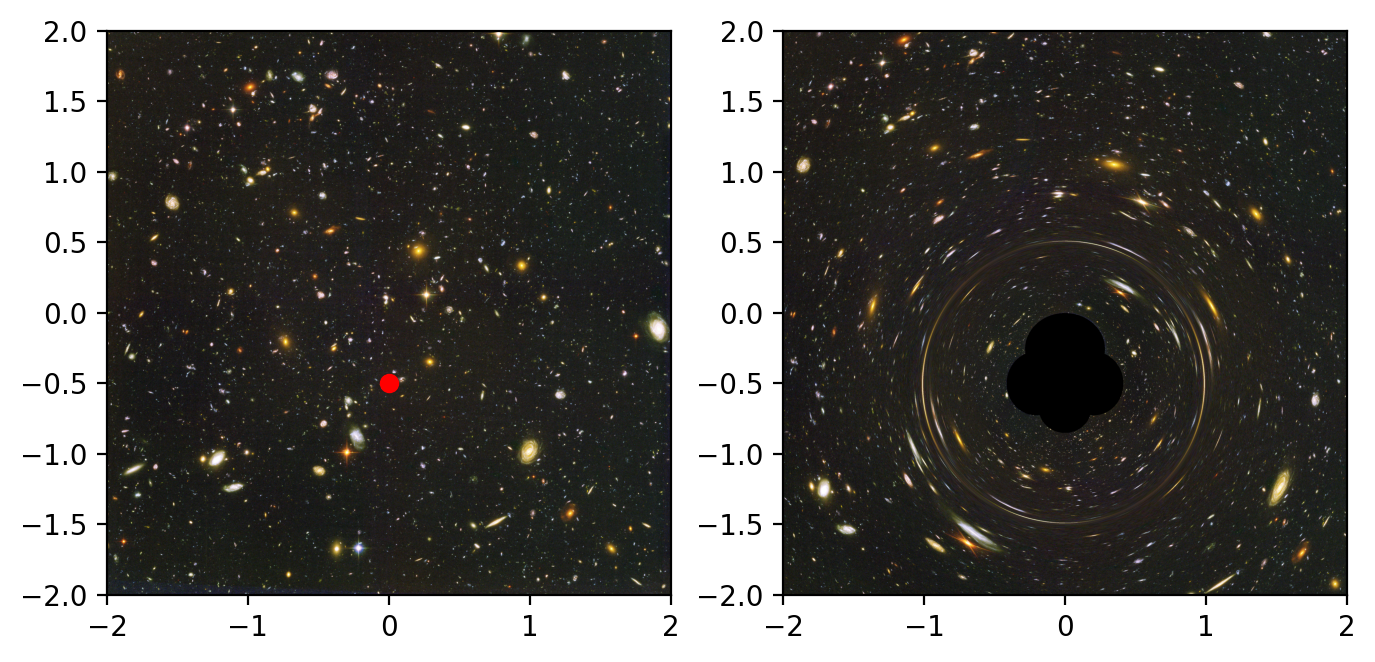

In [33]:
#Importing image from HST
im = Image.open("hudf_small.jpg")
data = asarray(im)
im_r=data[:,:,0]
im_g=data[:,:,1]
im_b=data[:,:,2]
rgb=[im_r,im_g,im_b]


#Shape of pixels in image:
nx=len(data)      # Tamaño de la imagen (pix)s
ny=len(data)      # Tamaño source (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1) # pixel size on the image map
ys=2.*yl/(ny-1) # pixel size on the source map

#Lens parameters
x1l=0       # X position
x2l=0.5       # Y position
ml=1        # Lens mass

# Empty vector for lensed images:
b1=np.zeros((nx,nx))
b2=np.zeros((nx,nx))
b3=np.zeros((nx,nx))

lensed=[b1,b2,b3]



#This is the main loop over pixels at the image plane
for i in range(3):
    for j1 in range(nx):
        for j2 in range(nx):
            x1=-xl+j2*xs # Convert pix to coords on image.
            x2=-xl+j1*xs
            y1,y2=l.Point(x1,x2,x1l,x2l,ml)
            i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
            i1=int(round((y2+yl)/ys))
            # If deflected ray hits a pixel within source then set image
            # to brightness on that pixel
            if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
                lensed[i][j1,j2]=rgb[i][i1,i2]
    

# Join the three colours in one jpg and show:
source_rgb = np.dstack((im_r,im_g,im_b))
lensed_rgb = np.dstack((b1,b2,b3))
fig=plt.figure(figsize=(8, 6), dpi=200)
plt.subplot(121)
plt.imshow(source_rgb,extent=(-yl,yl,-yl,yl))
plt.plot(x1l,-x2l,'ro')
plt.subplot(122)
plt.imshow(lensed_rgb.astype('uint8'),extent=(-xl,xl,-xl,xl))
plt.show()
fig.savefig("hudf_lensed.png")

### 6. Hubble Deep Field data though a SIS Lens animation.
In this section of the work we will make an animation computing many different images of the lens changing its position.

In [ ]:
#Creating folders for the output image.
dirname = 'tmp/'
exist = os.path.exists(dirname)
if exist=="False":
    os.mkdir(dirname)



#Importing image from HST
im = Image.open("hudf_small.jpg")
data = asarray(im)
im_r=data[:,:,0]            #Splitting image in three R G B images.
im_g=data[:,:,1]
im_b=data[:,:,2]
rgb=[im_r,im_g,im_b]



#Shape of pixels in the image for lensed animation:
nx=len(data)      # Image size (pix)
ny=len(data)      # Source size (pix)
xl=2.
yl=2.

xs=2.*xl/(nx-1)   # pixel size on the image map
ys=2.*yl/(ny-1)   # pixel size on the source map



# Lens positions and mass (we will keep mass constant in this section)
# IN fact, we will just change Y position.
x1l=0           # X position
#x2l=0.5        # Y position
ml=1            # Lens mass



# Empty vector for lensed images:
b1=np.zeros((nx,nx))
b2=np.zeros((nx,nx))
b3=np.zeros((nx,nx))
lensed=[b1,b2,b3]

n=1

for x2l in range(-200,210,5):
    x2l=x2l/100
    
    b1=np.zeros((nx,nx))
    b2=np.zeros((nx,nx))
    b3=np.zeros((nx,nx))
    lensed=[b1,b2,b3]
    
    #This is the main loop over pixels at the image plane
    for i in range(3):
        for j1 in range(nx):
            for j2 in range(nx):
                x1=-xl+j2*xs # Convert pix to coords on image.
                x2=-xl+j1*xs
                y1,y2=l.Point(x1,x2,x1l,x2l,ml)
                i2=int(round((y1+yl)/ys)) # Convert coordinates to pixels
                i1=int(round((y2+yl)/ys))
                # If deflected ray hits a pixel within source then set image
                # to brightness on that pixel
                if ((i1 >= 0) and (i1 < ny) and (i2 >= 0) and (i2 < ny)):
                    lensed[i][j1,j2]=rgb[i][i1,i2]

    # Join the three colours in one jpg and show:
    source_rgb = np.dstack((im_r,im_g,im_b))
    lensed_rgb = np.dstack((b1,b2,b3))
    fig=plt.figure(figsize=(8, 6), dpi=200)
    plt.subplot(121)
    plt.imshow(source_rgb,extent=(-yl,yl,-yl,yl))
    plt.plot(x1l,-x2l,'r',marker="2",ms=17)
    bbox_props=dict(boxstyle="round,pad=0.4", fc="0.3")
    plt.annotate("x="+"{:.2f}".format(x1l)+"\ny="+"{:.2f}".format(-x2l),(-1.75,-1.7),color="w",fontsize=12)
    plt.subplot(122)
    plt.imshow(lensed_rgb.astype('uint8'),extent=(-xl,xl,-xl,xl))
    plt.show()
    plt.imshow(lensed_rgb.astype('uint8'),extent=(-xl,xl,-xl,xl))
    fig.savefig("tmp/"+str(n)+".png", bbox_inches = 'tight')
    print("lens at y="+str(x2l)+" completed.")  
    n+=1
    
    #Re-defining:
    x2l=x2l*100

Making the last animation step:

In [ ]:
im1 = Image.open('tmp/1.png')

images = []

for k in range(2, 81):
    path = "tmp/" + str(k) + ".png"
    images.append(Image.open(path))

im1.save("SISlens_HDF.gif", save_all=True, append_images=images, duration=200, loop=2)

In [ ]:
fig=plt.figure(figsize=(8, 6), dpi=200,sharey='row')
plt.subplot(121)
plt.imshow(source_rgb,extent=(-yl,yl,-yl,yl))
plt.plot(x1l,-x2l,'r',marker="2",ms=17)
bbox_props=dict(boxstyle="round,pad=0.4", fc="0.3")
plt.annotate("x="+str(x1l)+"\ny="+str(-x2l),(-1.75,-1.7),color="w",fontsize=12)
plt.subplot(122)
plt.imshow(lensed_rgb.astype('uint8'),extent=(-xl,xl,-xl,xl))
plt.show()
plt.imshow(lensed_rgb.astype('uint8'),extent=(-xl,xl,-xl,xl))

### Magnitication maps

100%|██████████| 20000/20000 [00:54<00:00, 368.86it/s] 


Median magnification: 2.1333333333333333


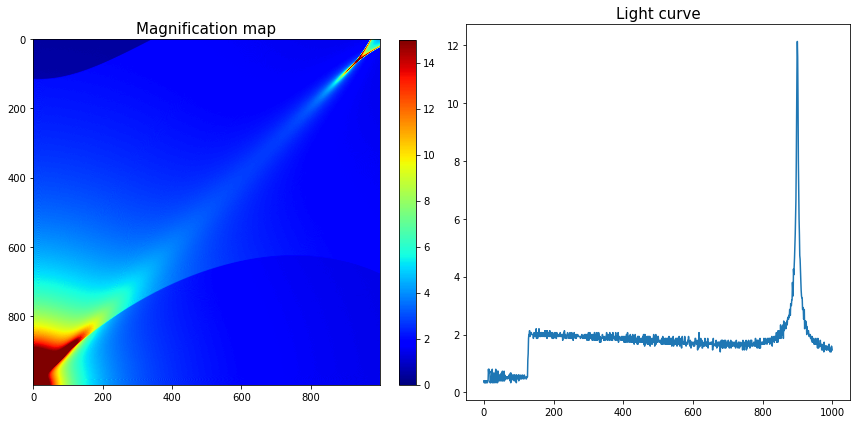

In [105]:
# x: image
# y: source
# cuanto mayor sea nx mejor para que el pixel del plano imagen que chutemos caiga seguro dentro de un pixel del mapa
# empezamos en 500, 1000, 2000
import numpy as np
import lens as l
import matplotlib.pyplot as plt

ny=1000
yl=0.3
xl=1.   

b=np.zeros((ny,ny))
raypix=15.              # This is the number of rays per pixel in absence of lensing.
sqrpix=np.sqrt(raypix)  # Rays per pixel square root (rays/pix in one dir)
sqrinpix=np.sqrt(1./raypix)
ys=2.*yl/(ny-1)         # Pixel size on source plane
xs=ys/sqrpix            # Side of the square area transported back by a ray.

# BEWARE. This may need to be larger for certain lens models !!!!
nx=20000 # Number of rays on a column/row at the image plane
yr=np.arange(0,nx) # This is an array with pixels on y direction
y,x=np.mgrid[0.0:1.0,0:nx] # Grid with pixel coordinates for a row at the image
perc0=5. # Percentage step for printing progress
perc=5. # Initial value for perc

# Parameters
x1l=0.
x1l1=-0.3
x2l1=0.3
x1l2=0.8
x2l2=-0.8
x2l=1.
ml=0.5
ml1=1.
ml2=1./100.
k=0.
g=0.2

for i in tqdm(yr): # Loop over rows or rays
    x1=-xl+y*xs # Convert pixels to coordinates in the image plane
    x2=-xl+x*xs
    y1,y2=l.TwoPoints(x1,x2,x1l1,x2l1,x1l2,x2l2,ml1,ml2)          # TwoPoints lens.
    #y1,y2=l.ChangRefsdal(x1,x2,x1l,x2l,ml,k,g)                # ChangRefsdal lens.
    #y1,y2=l.SIS(x1,x2,x1l,x2l,k)                              # SIS lens
    
    i1=(y1+yl)/ys # Convert coords to pixels at the source plane
    i2=(y2+yl)/ys
    i1=np.round(i1) # Make pixel coords integer numbers
    i2=np.round(i2)
    ind=(i1>=0) & (i1<ny) & (i2>=0) & (i2<ny) # Indices of rays falling into our source plane
    i1n=i1[ind] # Coordinates of pixels hitting our source plane
    i2n=i2[ind]
    for i in range(np.size(i1n)): # Loop over hits "on target"
        b[int(i2n[i]),int(i1n[i])]+=1  # Increase magnification at those pixels
    y+=1.     # Increase the y coordinate of the pixel/rays
    
b=b/raypix # Normalize magnification with N_r
print ("Median magnification: "+str(np.median(b))) # Print mean magnification


lum=np.array([])
for i in range(len(b)):
    lum=np.append(lum, b[100,i])

# Plot stuff    
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.set_title('Magnification map', fontsize=15)
b1=ax1.imshow(b,vmin=0,vmax=15,cmap='jet')
plt.colorbar(b1,ax=ax1,fraction=0.045)
ax2.set_title('Light curve', fontsize=15)
ax2.plot(np.linspace(0,ny,ny),lum)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


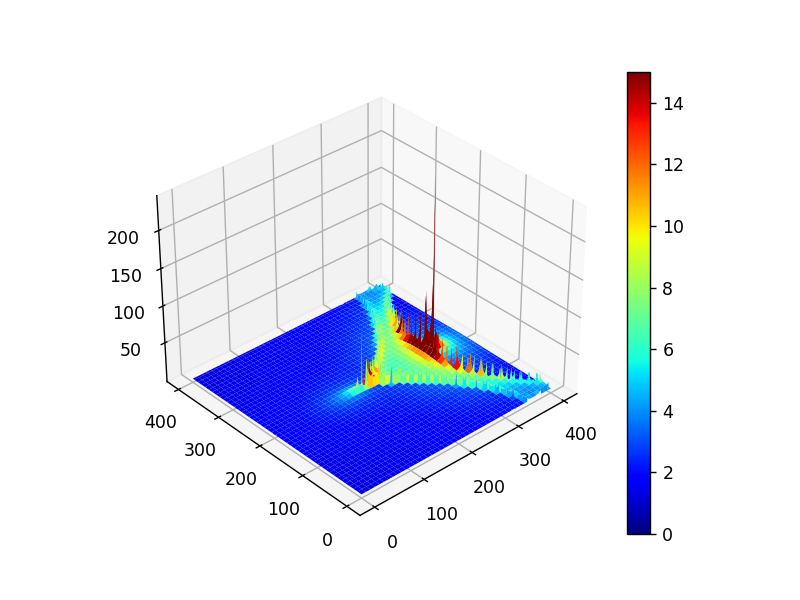

In [89]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

x=range(401)
x,y=np.meshgrid(x,x)

fig = plt.figure(dpi=100)
ax = plt.axes(projection='3d')
plot = ax.plot_surface(x,y,b,cmap="jet",vmin=0,vmax=15)
cbar = fig.colorbar(plot, ax = ax)
plt.show()


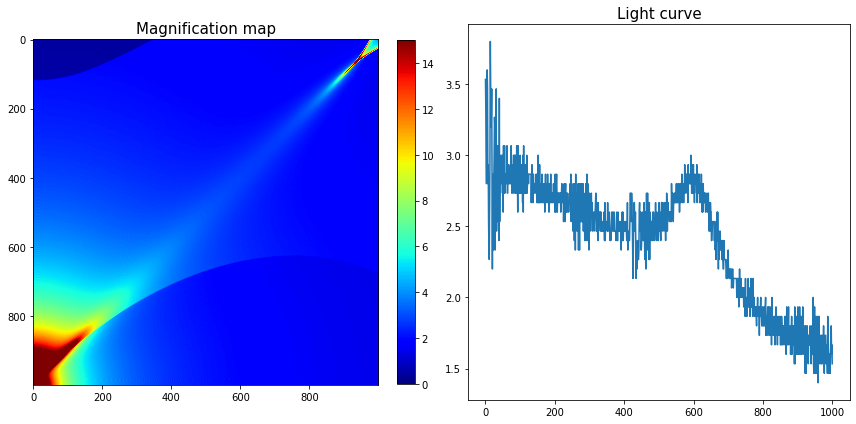

In [107]:
lum=np.array([])
for i in range(len(b)):
    lum=np.append(lum, b[400,i])

# Plot stuff    
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
ax1.set_title('Magnification map', fontsize=15)
b1=ax1.imshow(b,vmin=0,vmax=15,cmap='jet')
plt.colorbar(b1,ax=ax1,fraction=0.045)
ax2.set_title('Light curve', fontsize=15)
ax2.plot(np.linspace(0,ny,ny),lum)
plt.tight_layout()
plt.show()